Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature
2) Next_Tmin: Next day  minimum temperature

In [1]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#model cross validation
from sklearn.model_selection import cross_val_score


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [54]:
#Loading the Dataset:
df=pd.read_csv('TemperatureForecast.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [55]:
#display all the rows from the dataframe
pd.set_option('display.max_rows',None)

In [56]:
df.shape
#there is 7752 rows and 25 columns is availble in the data

(7752, 25)

In [57]:
df.info()
#the dataframe having the object and float datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [58]:
#checking null value from the dataframe
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [59]:
#there is lots of null value available in the many of the features.

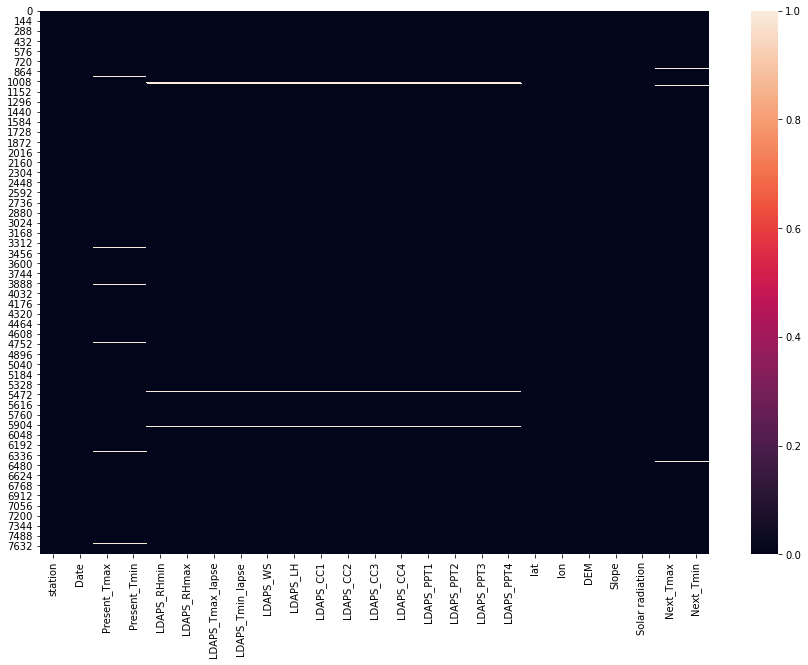

In [60]:
#there is no null value available in the dataframe.cross checking the same with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [57]:
#replacing the null value with the mean value of the features
df['station']=df['station'].fillna(df['station'].mean())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

df['Date']=df['Date'].fillna(df['Date'].mode()[0])

In [58]:
#checking the unique values of the dataframe
df.nunique()

station               25
Date                 310
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

In [64]:
#describe the dataframe
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [65]:
#the mean and median(50%) looks approx equal means there is less chance of outliers in the features.
#the other values like standerd daviation,min and max values are looks normal.

In [59]:
df['Date'].value_counts()

01-07-2013    27
08-07-2016    25
27-07-2015    25
11-07-2014    25
20-07-2014    25
24-07-2015    25
02-07-2013    25
21-08-2017    25
20-08-2016    25
26-08-2013    25
01-08-2016    25
30-07-2013    25
24-07-2016    25
17-07-2015    25
07-07-2016    25
15-08-2016    25
23-08-2017    25
15-08-2014    25
06-07-2014    25
04-08-2017    25
14-08-2015    25
30-08-2017    25
02-07-2014    25
06-07-2013    25
11-08-2014    25
07-08-2014    25
27-08-2016    25
16-08-2015    25
21-07-2017    25
02-08-2014    25
11-07-2016    25
08-08-2016    25
12-08-2014    25
20-08-2014    25
26-08-2014    25
25-08-2017    25
01-08-2015    25
08-07-2017    25
22-07-2017    25
12-07-2017    25
25-08-2014    25
05-08-2013    25
29-07-2013    25
29-08-2015    25
28-08-2016    25
19-07-2013    25
07-08-2013    25
16-07-2013    25
23-07-2016    25
26-07-2017    25
03-08-2013    25
17-07-2013    25
17-08-2014    25
16-08-2013    25
14-07-2013    25
14-07-2016    25
30-06-2015    25
24-08-2013    25
24-08-2014    

In [60]:
#encoding the date formet
import datetime as dt

df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [61]:
df['Date'].value_counts()

734875    27
735209    25
735798    25
735806    25
735810    25
735818    25
735826    25
735830    25
735834    25
735838    25
735878    25
735910    25
735970    25
736002    25
736030    25
736062    25
736122    25
736158    25
736162    25
735802    25
735794    25
736170    25
735786    25
735414    25
735422    25
735430    25
735434    25
735438    25
735442    25
735458    25
735462    25
735466    25
735470    25
735474    25
735514    25
735574    25
735606    25
735726    25
736166    25
736174    25
735210    25
736570    25
736670    25
734907    25
734935    25
734995    25
735027    25
735063    25
735067    25
735071    25
735075    25
735079    25
735087    25
735095    25
735099    25
735103    25
735107    25
736610    25
736566    25
736190    25
736562    25
736194    25
736198    25
736202    25
736206    25
736214    25
736306    25
736426    25
736510    25
736518    25
736526    25
736530    25
736534    25
736538    25
736554    25
736558    25
735330    25

In [12]:
#df['Date1']=df['Date']
#df.head()
#df['lat'].value_counts()

In [13]:
#dropping the date column as its data stored in Date1:
#df=df.drop(columns=['Date'],axis=1)
#df.head()

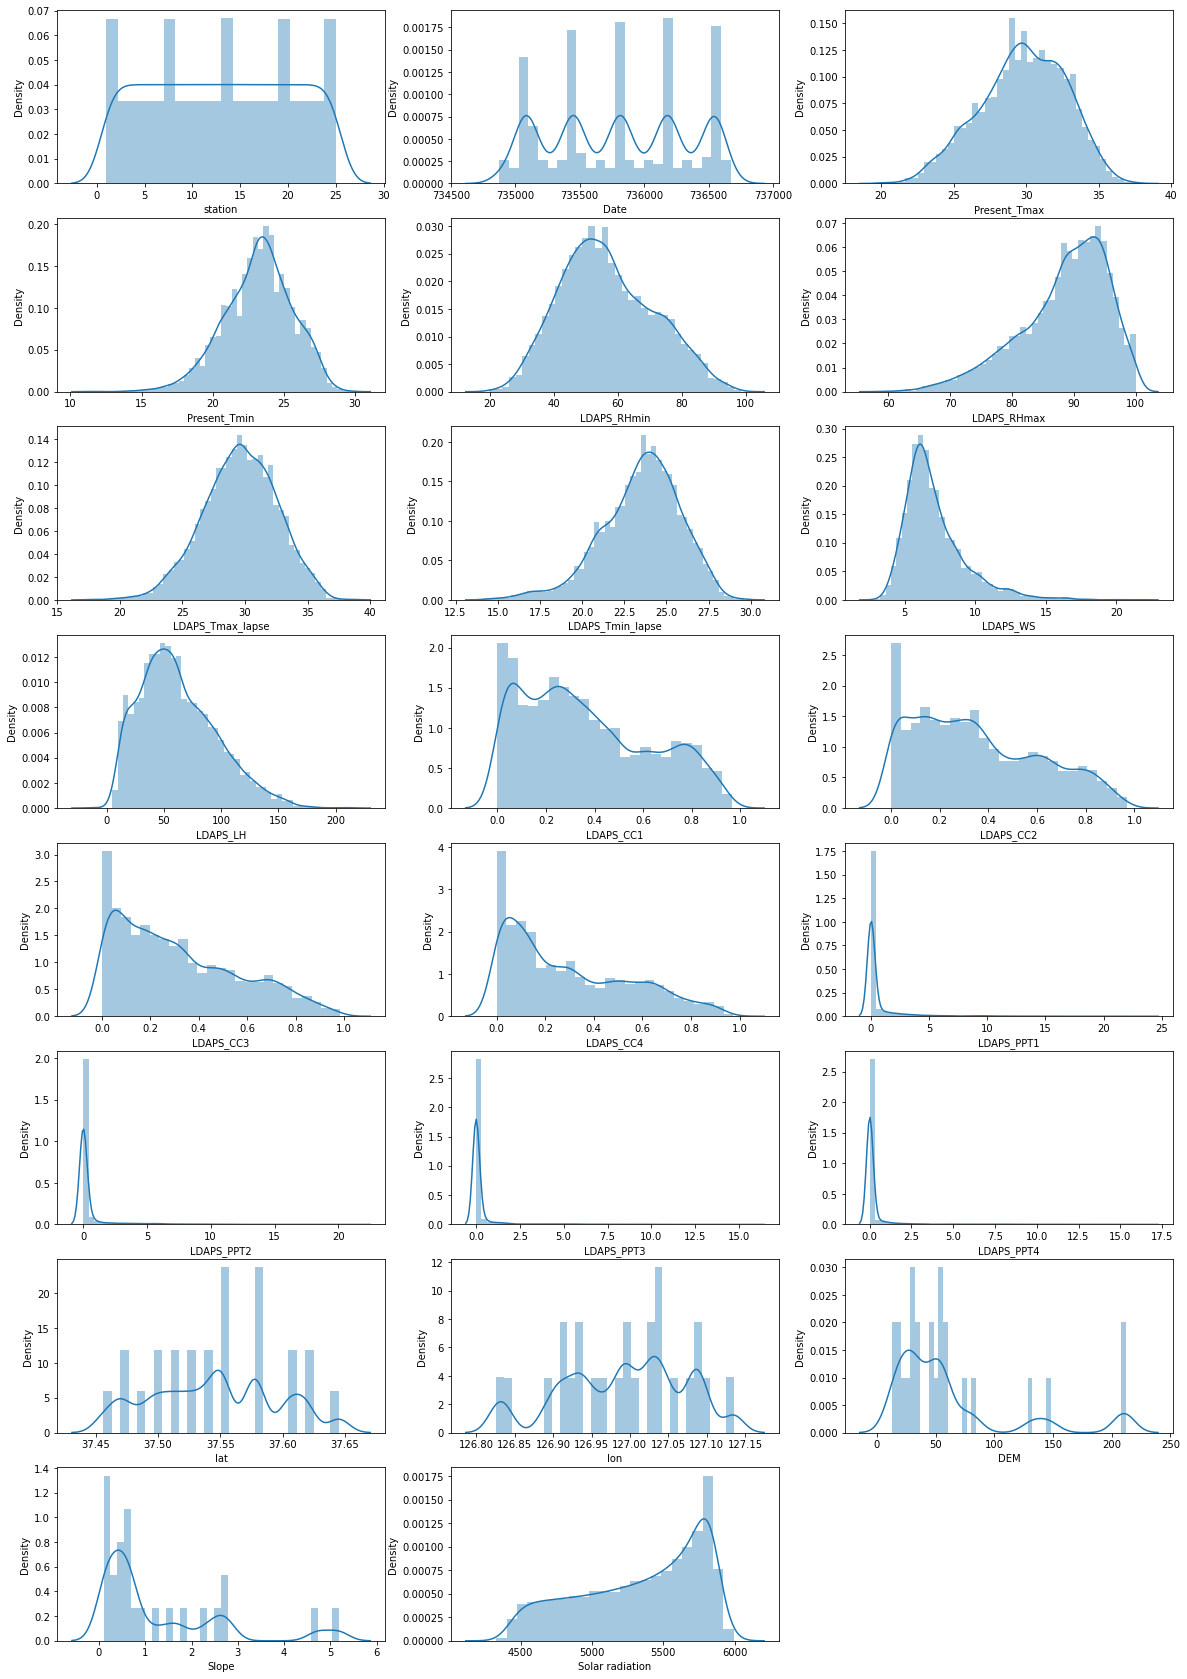

In [69]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,30),facecolor='white')
pltnum=1

for column in df.iloc[:,:23]:
    if pltnum <= 24:
        plt.subplot(8,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [15]:
#there is outliers avilable in the many of columns i.e.LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4.
#checking the same with the boxplot .

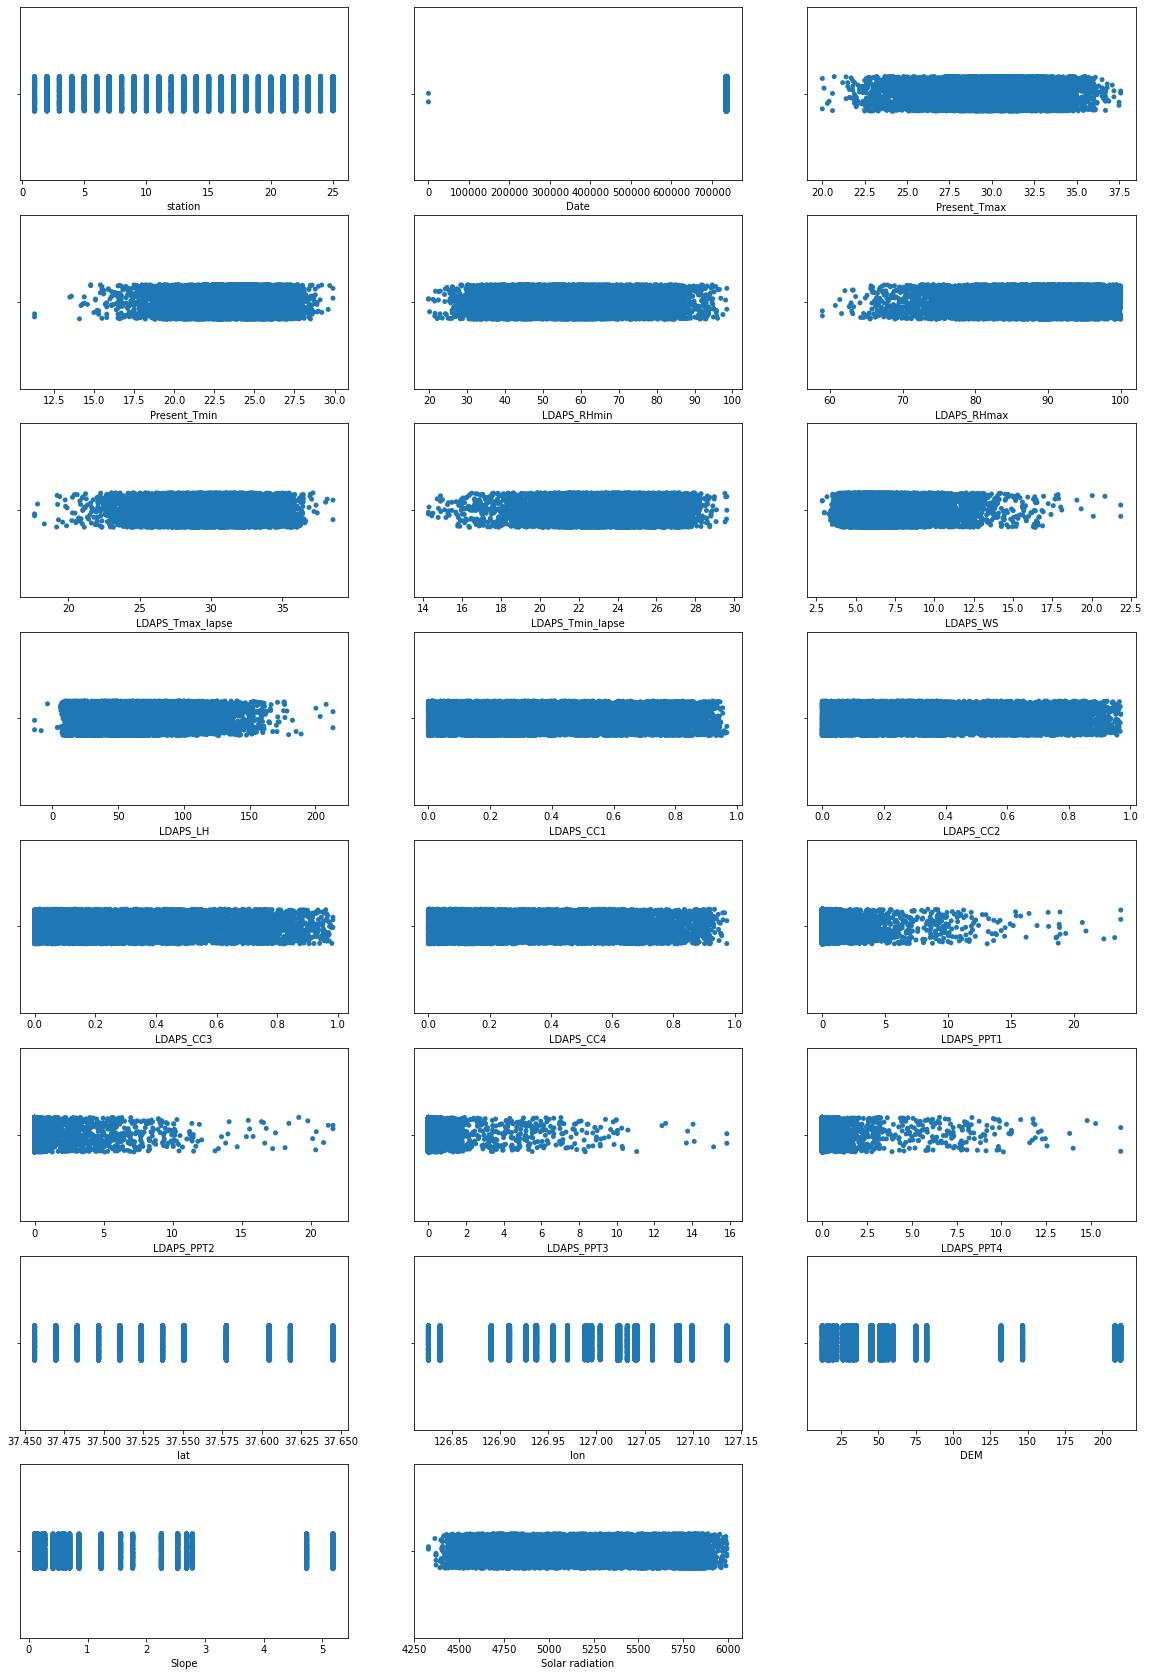

In [16]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,30),facecolor='white')
pltnum=1

for column in df.iloc[:,:23]:
    if pltnum <= 24:
        plt.subplot(8,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

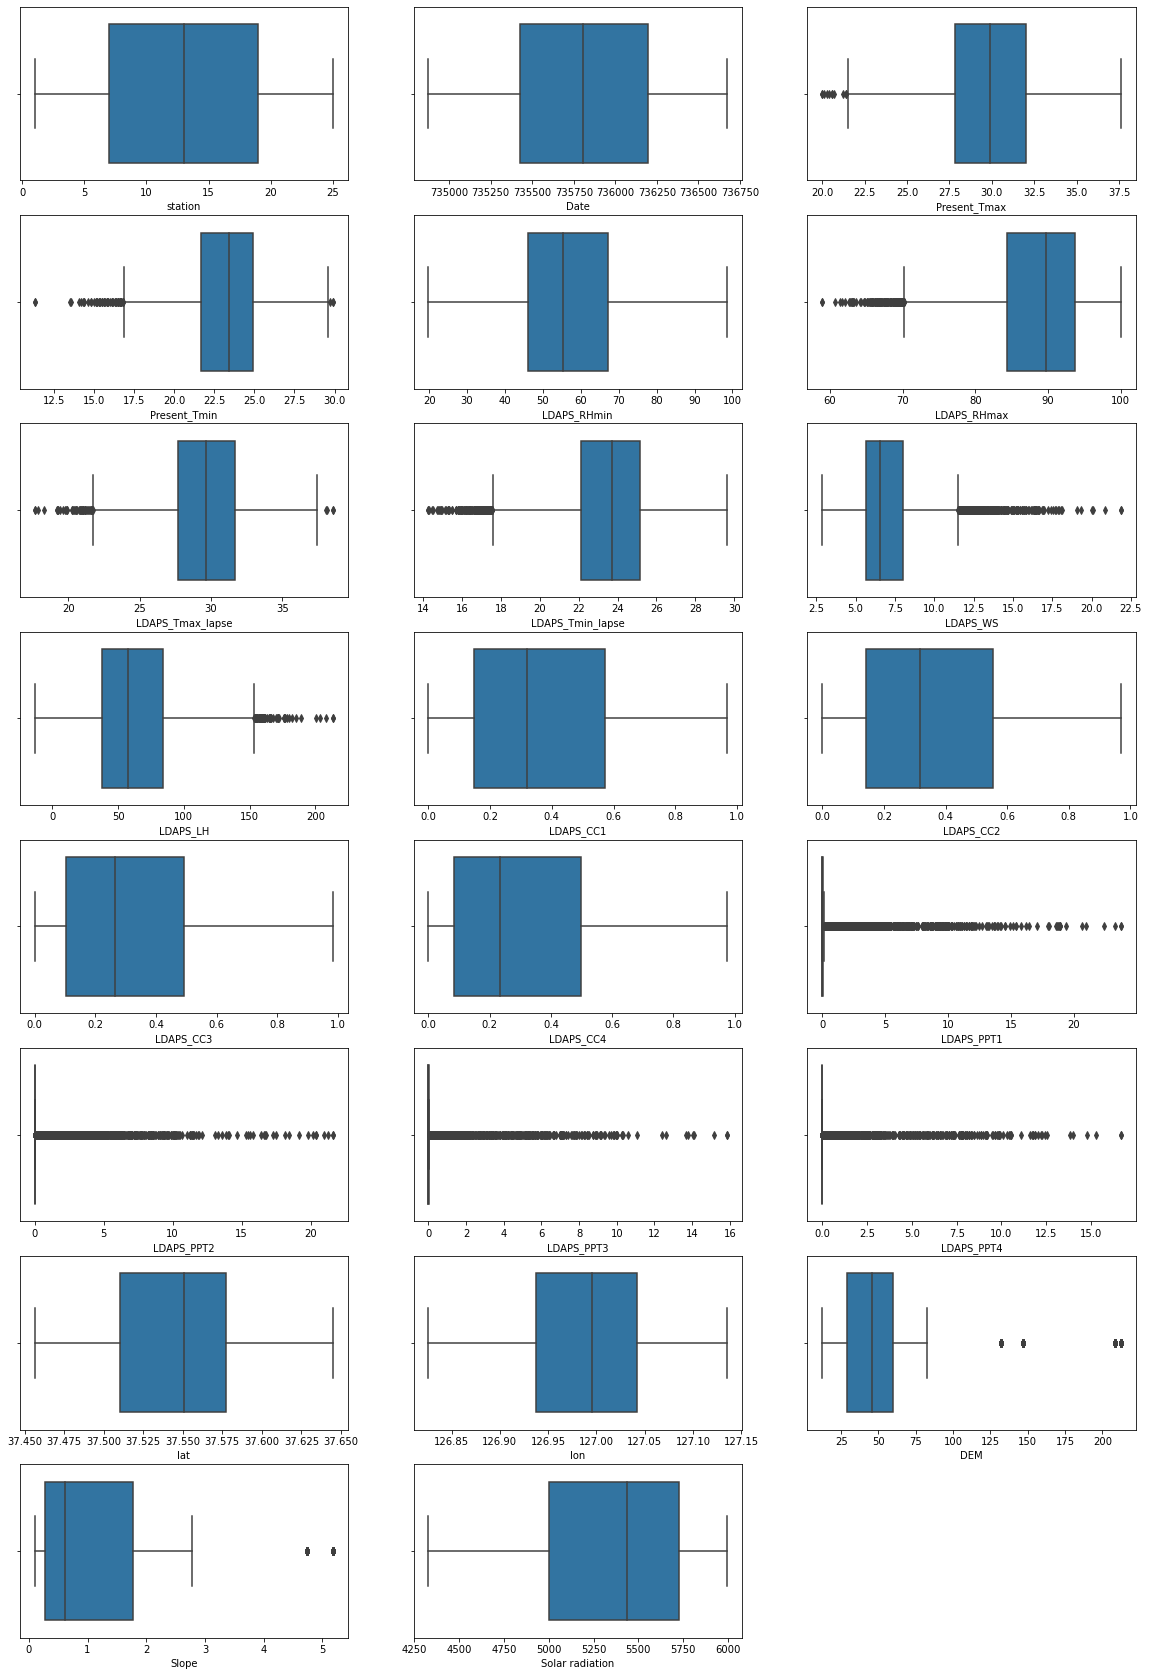

In [70]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,30),facecolor='white')
pltnum=1

for column in df.iloc[:,:23]:
    if pltnum <= 24:
        plt.subplot(8,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [18]:
#there is outlier are present in many of the features.
#the features are Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,
#LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope

In [19]:
#using z-score to find the outliers:
#z=np.abs(stats.zscore(df.iloc[:,[2,3,5,6,7,8,9,14,15,16,17,20,21]]))

In [20]:
#index=np.where(z > 3)[0]

In [21]:
#len(index)

In [22]:
#dropping the outlier index
#df=df.drop(df.index[index])

In [23]:
#checking the new shape
#df.shape

In [24]:
#Data Loss
#loss_percentage=(7752-6907)/7752*100
#print(loss_percentage)

In [62]:
#using the IQR method to find the outliers
q1=df.iloc[:,[2,3,5,6,7,8,9,14,15,16,17,20,21]].quantile(0.25)

q3=df.iloc[:,[2,3,5,6,7,8,9,14,15,16,17,20,21]].quantile(0.75)

iqr=q3-q1

In [63]:
for column in df.iloc[:,[3,6,8,9,14,15,16,17,20,21]]:
    index1=np.where(df[column] > (q3[column]+(1.5 * iqr[column])))
    
for column in df.iloc[:,[2,3,5,6,7]]:
    index1=np.where(df[column] < (q3[column]-(1.5 * iqr[column])))    

In [64]:
#dropping the outlier index
df=df.drop(df.index[index1])

In [65]:
#checking the new shape
df.shape

(6913, 25)

In [66]:
#Data Loss
loss_percentage=(7752-6913)/7752*100
print(loss_percentage)

10.823013415892673


In [67]:
#checking the skewness and correlation between features and the target Next_Tmax
corr_df=df.iloc[:,:24].abs().corr()
corr_df['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.788852
Present_Tmax        0.567871
LDAPS_Tmin_lapse    0.497752
Present_Tmin        0.379464
LDAPS_LH            0.218032
Date                0.135669
station             0.092333
lon                 0.013563
lat                -0.036429
Slope              -0.074903
LDAPS_PPT4         -0.129341
DEM                -0.141386
Solar radiation    -0.143313
LDAPS_PPT3         -0.151982
LDAPS_PPT1         -0.160633
LDAPS_PPT2         -0.188363
LDAPS_WS           -0.309606
LDAPS_RHmax        -0.335786
LDAPS_CC4          -0.467971
LDAPS_CC1          -0.509911
LDAPS_RHmin        -0.524632
LDAPS_CC3          -0.544996
LDAPS_CC2          -0.549297
Name: Next_Tmax, dtype: float64

In [68]:
#checking the skewness and correlation between features and the target Next_Tmax
corr_df=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24]].abs().corr()
corr_df['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.824571
Present_Tmin        0.731585
Present_Tmax        0.564115
LDAPS_Tmax_lapse    0.491514
station             0.118157
Date                0.113416
LDAPS_RHmin         0.012007
LDAPS_LH            0.011659
LDAPS_CC2          -0.027048
LDAPS_PPT1         -0.027811
LDAPS_WS           -0.028439
LDAPS_PPT2         -0.032066
lon                -0.036108
LDAPS_PPT3         -0.041180
lat                -0.061623
Solar radiation    -0.062464
LDAPS_CC3          -0.082710
LDAPS_PPT4         -0.084966
LDAPS_CC1          -0.088118
LDAPS_CC4          -0.107751
Slope              -0.119123
LDAPS_RHmax        -0.138790
DEM                -0.230334
Name: Next_Tmin, dtype: float64

In [109]:
#LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Present_Tmax,LDAPS_CC1,LDAPS_RHmin,LDAPS_CC3,LDAPS_CC2

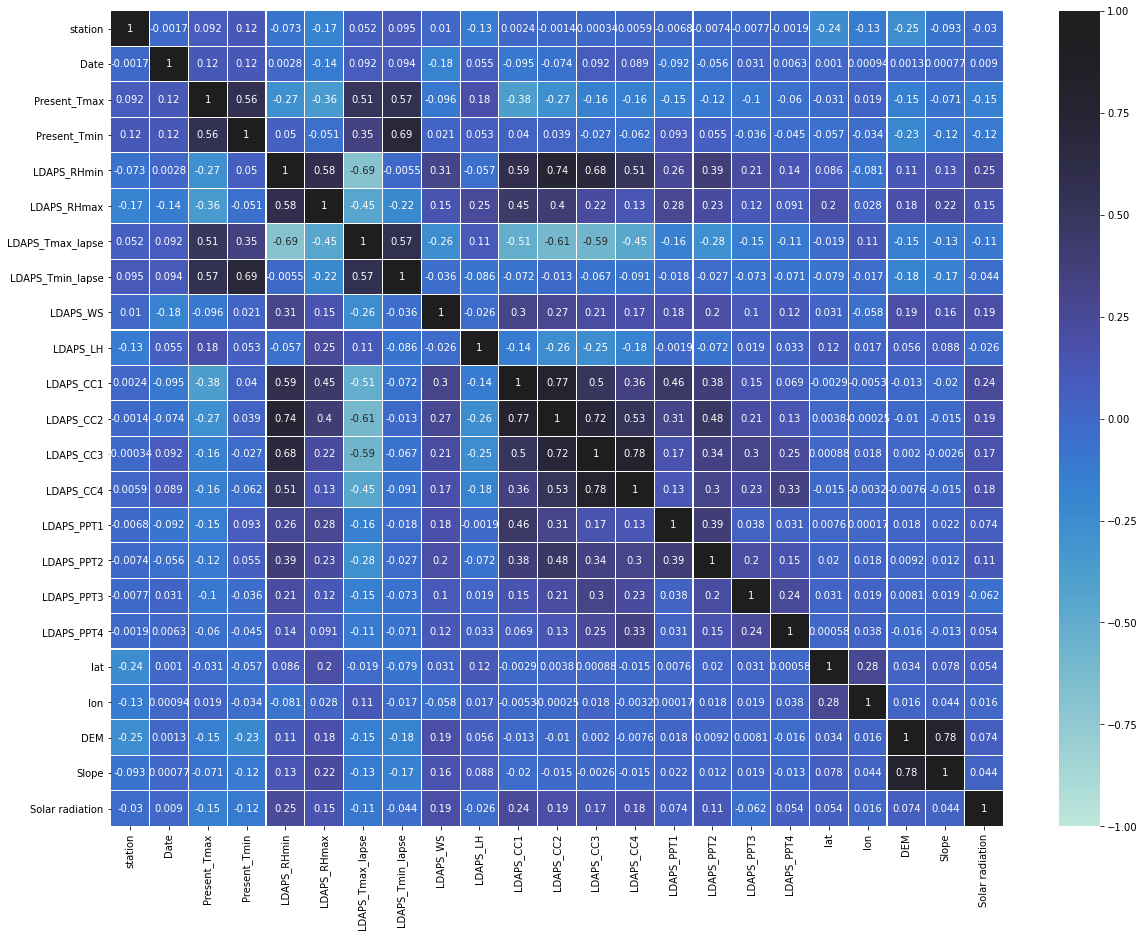

In [69]:
#using the heatmap to check the multicolliniarity between the features.
corr_matrix=df.iloc[:,:23].abs().corr()

plt.figure(figsize=(20,15))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()
#Total Bags,Total Volume

In [ ]:
#there is multicolliniary issues looks in multiple features.
#cross check the same with using the variance inflecaction factor.

In [70]:
x_tst=['LDAPS_Tmax_lapse','Present_Tmin','Present_Tmax','LDAPS_CC1','LDAPS_RHmin','LDAPS_CC3','LDAPS_CC2']
features=df[x_tst]

In [71]:
#using power transform to remove the skewness.
from sklearn.preprocessing import power_transform
x_tst=power_transform(features.values,method='yeo-johnson')

In [72]:
df[['LDAPS_Tmax_lapse','Present_Tmin','Present_Tmax','LDAPS_CC1','LDAPS_RHmin','LDAPS_CC3','LDAPS_CC2']]=x_tst
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,-0.556233,-1.066345,0.129605,91.116364,-0.731545,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,0.610186,-0.974137,-0.299305,90.604721,-0.068698,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,0.495354,-0.177369,-0.568677,83.973587,0.021257,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,0.648716,-0.129788,0.128501,96.483688,-0.123285,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,0.419430,-0.835214,-0.016371,90.155128,-0.343879,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [73]:
df1=df
df2=df

In [ ]:
#Performing the model building for the Next_Tmax target.

In [74]:
#Use SelectKbest
from sklearn.feature_selection import SelectKBest,f_classif

In [75]:
#seprating the x1 and and y1 for the target  Next_Tmax
x1=df1.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y1=df1['Next_Tmax']

In [76]:
best_feature=SelectKBest(score_func=f_classif,k=20)
fit=best_feature.fit(x1,y1)

In [77]:
df_score=pd.DataFrame(fit.scores_)
df_column=pd.DataFrame(x1.columns)

In [78]:
best_feat=pd.concat([df_column,df_score],axis=1)

In [79]:
best_feat.columns=['feature Column','Score']
print(best_feat.nlargest(20,'Score'))

      feature Column      Score
6   LDAPS_Tmax_lapse  74.139414
2       Present_Tmax  24.262445
11         LDAPS_CC2  20.523462
12         LDAPS_CC3  18.330484
7   LDAPS_Tmin_lapse  17.474908
4        LDAPS_RHmin  17.368205
10         LDAPS_CC1  15.943796
13         LDAPS_CC4  15.461596
3       Present_Tmin  10.315148
8           LDAPS_WS   6.634772
16        LDAPS_PPT3   6.568264
5        LDAPS_RHmax   6.406690
17        LDAPS_PPT4   3.428016
15        LDAPS_PPT2   3.220820
9           LDAPS_LH   3.176247
14        LDAPS_PPT1   2.989606
1               Date   2.481934
20               DEM   2.292694
22   Solar radiation   1.847987
0            station   1.506138


In [80]:
df3=pd.DataFrame(best_feat.nlargest(15,'Score'))
df3

,feature Column,Score
6,LDAPS_Tmax_lapse,74.139414
2,Present_Tmax,24.262445
11,LDAPS_CC2,20.523462
12,LDAPS_CC3,18.330484
7,LDAPS_Tmin_lapse,17.474908
4,LDAPS_RHmin,17.368205
10,LDAPS_CC1,15.943796
13,LDAPS_CC4,15.461596
3,Present_Tmin,10.315148
8,LDAPS_WS,6.634772


In [81]:
x_new=df1[df3['feature Column']]

In [82]:
x_new.shape

(6913, 15)

In [83]:
scalar=StandardScaler()
x_data=scalar.fit_transform(x_new)

In [84]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=x_new.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,features,vif score
0,LDAPS_Tmax_lapse,6.205452
1,Present_Tmax,2.496776
2,LDAPS_CC2,4.961050
3,LDAPS_CC3,4.322387
4,LDAPS_Tmin_lapse,4.864245
5,LDAPS_RHmin,5.854105
6,LDAPS_CC1,3.180049
7,LDAPS_CC4,2.716935
8,Present_Tmin,2.310793
9,LDAPS_WS,1.164021


In [49]:
#x_new=x_new.drop(columns='LDAPS_Tmax_lapse',axis=1)

In [50]:
#scalar=StandardScaler()
#x_data=scalar.fit_transform(x_new)

In [90]:
#checking feature colliniarity using VIF
#vif=pd.DataFrame()
#vif['features']=x_new.columns
#vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
#vif

In [86]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_data,y1,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_r2=r2_score(y_test,y_pred)
    if acc_r2 > maxAcc:
        maxAcc=acc_r2
        maxRs=i
        
print(f"Best Accuracy(Next_Tmax) is : {maxAcc* 100:.2f}%")
print("The Best Random State(Next_Tmax) is :",maxRs)     

Best Accuracy(Next_Tmax) is : 74.56%
The Best Random State(Next_Tmax) is : 194


In [87]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_data,y1,test_size=0.20,random_state=194)

In [88]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
print(f"The accuracy of the model using LinearRegression(Next_Tmax) is: {r2_score(y_test,y_predlr)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)
print(f"The accuracy of the model for Next_Tmax using KNeighborsRegressor(Next_Tmax) is: {r2_score(y_test,y_predknn)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predrfr=rfr.predict(x_test)
print(f"The accuracy of the model for Next_Tmax using RandomForestRegressor(Next_Tmax) is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_predada=ada.predict(x_test)
print(f"The accuracy of the model for Next_Tmax using AdaBoostRegressor(Next_Tmax) is: {r2_score(y_test,y_predada)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr=SVR()
svr.fit(x_train,y_train)
y_predsvr=svr.predict(x_test)
print(f"The accuracy of the model for Next_Tmax using SVR(Next_Tmax) is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression(Next_Tmax) is: 74.18%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model for Next_Tmax using KNeighborsRegressor(Next_Tmax) is: 89.74%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model for Next_Tmax using RandomForestRegressor(Next_Tmax) is: 88.76%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model for Next_Tmax using AdaBoostRegressor(Next_Tmax) is: 73.98%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model for Next_Tmax using SVR(Next_Tmax) is: 84.58%



In [89]:
print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x_data,y1,cv=5)
print(f"Cross validation for the Linear Reggression(Next_Tmax) is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x_data,y1,cv=5)
print(f"Cross validation for the KNeighborsRegressor(Next_Tmax) is: {cvs_knn.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x_data,y1,cv=5)
print(f"Cross validation for the Random Forest Regressor(Next_Tmax) is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x_data,y1,cv=5)
print(f"Cross validation for the AdaBoostRegressor(Next_Tmax) is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x_data,y1,cv=5)
print(f"Cross validation for the SVR Classifier(Next_Tmax) is: {cvs_svr.mean()*100:.2f}%\n")


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression(Next_Tmax) is: 63.36%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor(Next_Tmax) is: 46.16%


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor(Next_Tmax) is: 61.14%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor(Next_Tmax) is: 58.80%


===================Cross Validation Score of SVR========================
Cross validation for the SVR Classifier(Next_Tmax) is: 58.44%



In [91]:
#Regularation Process
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [92]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le=Lasso(alpha=0.0001,)
le.fit(x_train,y_train)
predictlasso = le.predict(x_test)
le.score(x_train,y_train)
print(f"The accuracy of the model using Lasso(Next_Tmax) is: {r2_score(y_test,predictlasso)*100:.2f}%\n")


# Ridge model
print('\n==========Accuracy of Ridge===========')
rg =Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predictridge = rg.predict(x_test)
print(f"The accuracy of the model using Ridge(Next_Tmax) is: {r2_score(y_test,predictridge)*100:.2f}%\n")


# Elastic model
print('\n==========Accuracy of Elastic===========')
el=ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predictel = el.predict(x_test)
print(f"The accuracy of the model using ElasticNet(Next_Tmax) is: {r2_score(y_test,predictel)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso(Next_Tmax) is: 74.18%


==========Accuracy of Ridge===========
The accuracy of the model using Ridge(Next_Tmax) is: 74.18%


==========Accuracy of Elastic===========
The accuracy of the model using ElasticNet(Next_Tmax) is: 74.18%



In [93]:
print('\n==========Cross Validation Score of Lasso===========')
cvs_le=cross_val_score(le,x_data,y1,cv=5)
print(f"Cross validation for the LASSO(Next_Tmax) is: {cvs_le.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Ridge===========')
cvs_rg=cross_val_score(rg,x_data,y1,cv=5)
print(f"Cross validation for the Ridge(Next_Tmax) is: {cvs_rg.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of ElasticNet===========')
cvs_el=cross_val_score(el,x_data,y1,cv=5)
print(f"Cross validation for the ElasticNet(Next_Tmax) is: {cvs_el.mean()*100:.2f}%\n")


==========Cross Validation Score of Lasso===========
Cross validation for the LASSO(Next_Tmax) is: 63.36%


==========Cross Validation Score of Ridge===========
Cross validation for the Ridge(Next_Tmax) is: 63.36%


==========Cross Validation Score of ElasticNet===========
Cross validation for the ElasticNet(Next_Tmax) is: 63.36%



In [ ]:
#As we can see that the result of r2 accuracy and cross validation score of all the models.
#LinearReggression(Next_Tmax):74.18%
#Cross Validation Score(Next_Tmax):63.36%
#Diffrence(Next_Tmax):10.82

#KNeighborsRegressor(Next_Tmax):89.74%
#Cross Validation Score(Next_Tmax):46.16%
#Diffrence(Next_Tmax):43.58

#Random Forest Regressor(Next_Tmax):88.70%
#Cross Validation Score(Next_Tmax):61.12%
#Diffrence(Next_Tmax):27.58

#AdaBoostRegressor(Next_Tmax):74.20%
#Cross Validation Score(Next_Tmax):59.00%
#Diffrence(Next_Tmax):15.2

#SVR(Next_Tmax):84.58%
#Cross Validation Score(Next_Tmax):58.44%
#Diffrence(Next_Tmax):26.06

#LASSO(Next_Tmax):74.18%
#Cross Validation Score(Next_Tmax):63.36%
#Diffrence(Next_Tmax):10.82

#Ridge(Next_Tmax):74.18%
#Cross Validation Score(Next_Tmax):63.36%
#Diffrence(Next_Tmax):10.82

#ElasticNet(Next_Tmax):74.18%
#Cross Validation Score(Next_Tmax):63.36%
#Diffrence(Next_Tmax):10.82

In [ ]:
#Selecting the Lasso for the hyper parameter tuning as it has the lowest diffrence of cross validation score.

In [94]:
# Lasso Regrssion param

param ={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['cyclic', 'random']}

In [95]:
#for Lasso
lasso_hp=GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.001, 'selection': 'cyclic'}

In [97]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le=Lasso(alpha=0.0001,selection='cyclic')
le.fit(x_train,y_train)
predictlasso = le.predict(x_test)
le.score(x_train,y_train)
print(f"The accuracy of the model using Lasso is: {r2_score(y_test,predictlasso)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso is: 74.18%



In [ ]:
#after peroforming the hyper parameter tuning also the r2_score values is still same.so saving the model as final model.

In [98]:
#Saving the Model
import joblib

In [99]:
joblib.dump(le,'Temperature Forecast Model1.pkl')

['Temperature Forecast Model1.pkl']

In [ ]:
#This Complete our Model Building for Next_Tmax target.

In [ ]:
#Now performing the model building for the Next_Tmin target.

In [116]:
#seprating the x1 and and y1 for the target  Next_Tmax
x2=df2.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y2=df2['Next_Tmin']

In [117]:
best_feature1=SelectKBest(score_func=f_classif,k=20)
fit1=best_feature.fit(x2,y2)

In [118]:
df_score1=pd.DataFrame(fit.scores_)
df_column1=pd.DataFrame(x2.columns)

In [119]:
best_feat1=pd.concat([df_column1,df_score1],axis=1)

In [120]:
best_feat1.columns=['feature Column','Score']
print(best_feat1.nlargest(20,'Score'))

      feature Column       Score
7   LDAPS_Tmin_lapse  126.246314
3       Present_Tmin   68.565322
2       Present_Tmax   30.064608
6   LDAPS_Tmax_lapse   20.000237
20               DEM    4.326448
13         LDAPS_CC4    3.115674
5        LDAPS_RHmax    2.942145
17        LDAPS_PPT4    2.941823
22   Solar radiation    2.781572
12         LDAPS_CC3    2.510345
0            station    2.299455
14        LDAPS_PPT1    2.039081
4        LDAPS_RHmin    2.020795
16        LDAPS_PPT3    1.959699
8           LDAPS_WS    1.948411
21             Slope    1.783321
1               Date    1.770950
11         LDAPS_CC2    1.606289
10         LDAPS_CC1    1.524096
15        LDAPS_PPT2    1.449700


In [121]:
df4=pd.DataFrame(best_feat1.nlargest(13,'Score'))
df4

,feature Column,Score
7,LDAPS_Tmin_lapse,126.246314
3,Present_Tmin,68.565322
2,Present_Tmax,30.064608
6,LDAPS_Tmax_lapse,20.000237
20,DEM,4.326448
13,LDAPS_CC4,3.115674
5,LDAPS_RHmax,2.942145
17,LDAPS_PPT4,2.941823
22,Solar radiation,2.781572
12,LDAPS_CC3,2.510345


In [122]:
x_new1=df2[df4['feature Column']]

In [123]:
x_new1.shape

(6913, 13)

In [124]:
scalar=StandardScaler()
x_data1=scalar.fit_transform(x_new1)

In [125]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=x_new1.columns
vif['vif score']=[variance_inflation_factor(x_data1,i) for i in range(x_data1.shape[1])]
vif

,features,vif score
0,LDAPS_Tmin_lapse,4.285836
1,Present_Tmin,2.386189
2,Present_Tmax,1.980111
3,LDAPS_Tmax_lapse,5.808840
4,DEM,1.152810
5,LDAPS_CC4,2.696019
6,LDAPS_RHmax,2.056988
7,LDAPS_PPT4,1.147314
8,Solar radiation,1.151763
9,LDAPS_CC3,3.549489


In [126]:
x_new1=x_new1.drop(columns='LDAPS_RHmin',axis=1)

In [127]:
scalar=StandardScaler()
x_data1=scalar.fit_transform(x_new1)

In [128]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=x_new1.columns
vif['vif score']=[variance_inflation_factor(x_data1,i) for i in range(x_data1.shape[1])]
vif

,features,vif score
0,LDAPS_Tmin_lapse,2.897634
1,Present_Tmin,2.381200
2,Present_Tmax,1.967743
3,LDAPS_Tmax_lapse,3.147992
4,DEM,1.146894
5,LDAPS_CC4,2.695671
6,LDAPS_RHmax,1.526484
7,LDAPS_PPT4,1.146812
8,Solar radiation,1.090712
9,LDAPS_CC3,3.290423


In [129]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train1,x_test1,y_train1,y_test1=train_test_split(x_data1,y2,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train1,y_train1)
    y_pred1=lr.predict(x_test1)
    acc_r2=r2_score(y_test1,y_pred1)
    if acc_r2 > maxAcc:
        maxAcc=acc_r2
        maxRs=i
        
print(f"Best Accuracy(Next_Tmin) is : {maxAcc* 100:.2f}%")
print("The Best Random State(Next_Tmin) is :",maxRs)     

Best Accuracy(Next_Tmin) is : 76.46%
The Best Random State(Next_Tmin) is : 92


In [130]:
#seprating the train and test datasets with the best find random state
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data1,y2,test_size=0.20,random_state=92)

In [131]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr1=LinearRegression()
lr1.fit(x_train1,y_train1)
y_predlr1=lr1.predict(x_test1)
print(f"The accuracy of the model using LinearRegression(Next_Tmin) is: {r2_score(y_test1,y_predlr1)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn1=KNeighborsRegressor()
knn1.fit(x_train1,y_train1)
y_predknn1=knn1.predict(x_test1)
print(f"The accuracy of the model using KNeighborsRegressor(Next_Tmin) is: {r2_score(y_test1,y_predknn1)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr1=RandomForestRegressor()
rfr1.fit(x_train1,y_train1)
y_predrfr1=rfr1.predict(x_test1)
print(f"The accuracy of the model using RandomForestRegressor(Next_Tmin) is: {r2_score(y_test1,y_predrfr1)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada1=AdaBoostRegressor()
ada1.fit(x_train1,y_train1)
y_predada1=ada1.predict(x_test1)
print(f"The accuracy of the model using AdaBoostRegressor(Next_Tmin) is: {r2_score(y_test1,y_predada1)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr1=SVR()
svr1.fit(x_train1,y_train1)
y_predsvr1=svr1.predict(x_test1)
print(f"The accuracy of the model using SVR(Next_Tmin) is: {r2_score(y_test1,y_predsvr1)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression(Next_Tmin) is: 76.42%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model using KNeighborsRegressor(Next_Tmin) is: 84.64%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor(Next_Tmin) is: 86.91%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model using AdaBoostRegressor(Next_Tmin) is: 75.08%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model using SVR(Next_Tmin) is: 83.16%



In [132]:
print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr1=cross_val_score(lr1,x_data1,y2,cv=5)
print(f"Cross validation for the Linear Reggression(Next_Tmin) is: {cvs_lr1.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn1=cross_val_score(knn1,x_data1,y2,cv=5)
print(f"Cross validation for the KNeighborsRegressor(Next_Tmin) is: {cvs_knn1.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr1=cross_val_score(rfr1,x_data1,y2,cv=5)
print(f"Cross validation for the Random Forest Regressor(Next_Tmin) is: {cvs_rfr1.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada1=cross_val_score(ada1,x_data1,y2,cv=5)
print(f"Cross validation for the AdaBoostRegressor(Next_Tmin) is: {cvs_ada1.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr1=cross_val_score(svr1,x_data1,y2,cv=5)
print(f"Cross validation for the SVR Classifier(Next_Tmin) is: {cvs_svr1.mean()*100:.2f}%\n")


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression(Next_Tmin) is: 68.01%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor(Next_Tmin) is: 55.33%


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor(Next_Tmin) is: 68.29%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor(Next_Tmin) is: 63.97%


===================Cross Validation Score of SVR========================
Cross validation for the SVR Classifier(Next_Tmin) is: 63.48%



In [133]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le1=Lasso(alpha=0.0001)
le1.fit(x_train1,y_train1)
predictlasso1 = le1.predict(x_test1)
le1.score(x_train1,y_train1)
print(f"The accuracy of the model using Lasso(Next_Tmin) is: {r2_score(y_test1,predictlasso1)*100:.2f}%\n")


# Ridge model
print('\n==========Accuracy of Ridge===========')
rg1 =Ridge(alpha=0.0001)
rg1.fit(x_train1,y_train1)
rg1.score(x_train1,y_train1)
predictridge1 = rg1.predict(x_test1)
print(f"The accuracy of the model using Ridge(Next_Tmin) is: {r2_score(y_test1,predictridge1)*100:.2f}%\n")


# Elastic model
print('\n==========Accuracy of Elastic===========')
el1=ElasticNet(alpha=0.0001)
el1.fit(x_train1,y_train1)
el1.score(x_train1,y_train1)
predictel1 = el1.predict(x_test1)
print(f"The accuracy of the model using ElasticNet(Next_Tmin) is: {r2_score(y_test1,predictel1)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso(Next_Tmin) is: 76.42%


==========Accuracy of Ridge===========
The accuracy of the model using Ridge(Next_Tmin) is: 76.42%


==========Accuracy of Elastic===========
The accuracy of the model using ElasticNet(Next_Tmin) is: 76.42%



In [134]:
print('\n==========Cross Validation Score of Lasso===========')
cvs_le1=cross_val_score(le1,x_data1,y2,cv=5)
print(f"Cross validation for the LASSO(Next_Tmin) is: {cvs_le1.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Ridge===========')
cvs_rg1=cross_val_score(rg1,x_data1,y2,cv=5)
print(f"Cross validation for the Ridge(Next_Tmin) is: {cvs_rg1.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of ElasticNet===========')
cvs_el1=cross_val_score(el1,x_data1,y2,cv=5)
print(f"Cross validation for the ElasticNet(Next_Tmin) is: {cvs_el1.mean()*100:.2f}%\n")


==========Cross Validation Score of Lasso===========
Cross validation for the LASSO(Next_Tmin) is: 68.02%


==========Cross Validation Score of Ridge===========
Cross validation for the Ridge(Next_Tmin) is: 68.01%


==========Cross Validation Score of ElasticNet===========
Cross validation for the ElasticNet(Next_Tmin) is: 68.02%



In [ ]:
#As we can see that the result of r2 accuracy and cross validation score of all the models.
#LinearReggression(Next_Tmin):76.42%
#Cross Validation Score(Next_Tmin):68.01%
#Diffrence(Next_Tmin):8.38

#KNeighborsRegressor(Next_Tmin):84.64%
#Cross Validation Score(Next_Tmin):55.33%
#Diffrence(Next_Tmin):29.31

#Random Forest Regressor(Next_Tmin):86.91%
#Cross Validation Score(Next_Tmin):68.29%
#Diffrence(Next_Tmin):18.62

#AdaBoostRegressor(Next_Tmin):75.08%
#Cross Validation Score(Next_Tmin):63.97%
#Diffrence(Next_Tmin):11.11

#SVR(Next_Tmin):83.16%
#Cross Validation Score(Next_Tmin):63.48%
#Diffrence(Next_Tmin):19.68

#LASSO(Next_Tmin):76.42%
#Cross Validation Score(Next_Tmin):68.01%
#Diffrence(Next_Tmin):8.38

#Ridge(Next_Tmin):76.42%
#Cross Validation Score(Next_Tmin):68.01%
#Diffrence(Next_Tmin):8.38

#ElasticNet(Next_Tmin):76.42%
#Cross Validation Score(Next_Tmin):68.01%
#Diffrence(Next_Tmin):8.38

In [ ]:
#Selecting the Lasso for the hyper parameter tuning as it has the lowest diffrence of cross validation score.

In [135]:
# Lasso Regrssion param

param ={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['cyclic', 'random']}

In [136]:
#for Lasso
lasso_hp=GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train1,y_train1)
lasso_hp.best_params_

{'alpha': 0.0001, 'selection': 'random'}

In [141]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le1=Lasso(alpha=0.0001,selection='random')
le1.fit(x_train1,y_train1)
predictlasso1 = le1.predict(x_test1)
le1.score(x_train1,y_train1)
print(f"The accuracy of the model using Lasso(Next_Tmin) is: {r2_score(y_test1,predictlasso1)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso(Next_Tmin) is: 76.42%



In [ ]:
#after peroforming the hyper parameter tuning also the r2_score values is still same.so saving the model as final model.

In [142]:
#saving the model
import joblib

In [143]:
joblib.dump(le1,'Temperature_Forecast_Model2.pkl')

['Temperature_Forecast_Model2.pkl']

In [ ]:
#this complete our model building.